# Micro & Macro Analysis: Model Comparison

This notebook visualizes and compares the micro and macro evaluation results for all models in this dataset. Each metric is shown as a grouped bar chart, using a consistent color palette for clarity.

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..', 'analysis')))
from plot_style import set_global_style

# Set up paths for this dataset
base_path = os.path.join('..', '..', 'results', 'eudract')
micro_files = {
    "Parker":  'parker_results_micro.json',
    "Gemini 2.0 Flash Lite": 'gemini_2_0_flash_lite_results_micro.json',
}
macro_files = {
    "Parker":  'parker_results_macro.json',
    "Gemini 2.0 Flash Lite": 'gemini_2_0_flash_lite_results_macro.json',
}

# Color palette for all models
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77']

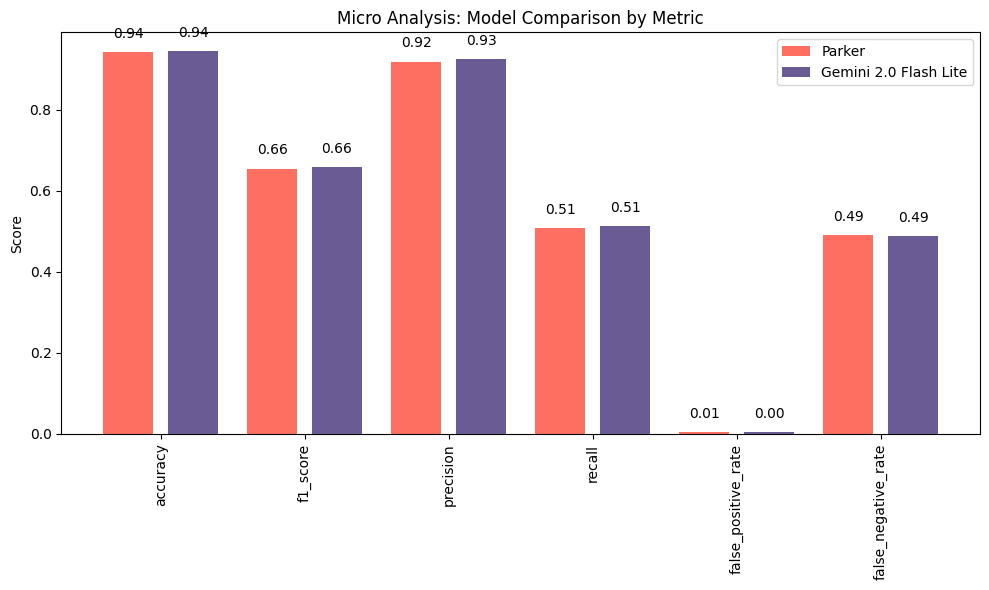

In [ ]:
# --- Micro Analysis ---
model_data = {}
for model, file_name in micro_files.items():
    with open(os.path.join(base_path, file_name), 'r') as f:
        model_data[model] = json.load(f)
metrics = ["accuracy", "f1_score", "precision", "recall", "false_positive_rate", "false_negative_rate"]
models = list(model_data.keys())
x = np.arange(len(metrics))
width = 0.8 / len(models)
fig, ax = plt.subplots(figsize=(10, 6))
for i, (model, color) in enumerate(zip(models, colors)):
    # Add a small gap between bars by increasing the width slightly and shifting the bars
    bar_shift = 0.05  # small gap
    bar_pos = x + (i - (len(models) - 1) / 2) * width + (i - 0.5) * bar_shift
    rects = ax.bar(bar_pos,
                   [model_data[model][metric] for metric in metrics],
                   width - bar_shift, label=model, color=color)
    for rect in rects:
        height = rect.get_height()
        # Show only two decimal digits
        ax.annotate(
            f"{height:.2f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 8),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )
ax.set_ylabel("Score")
ax.set_title("Micro Analysis: Model Comparison by Metric")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=90)
ax.legend()
plt.tight_layout(pad=2.0)

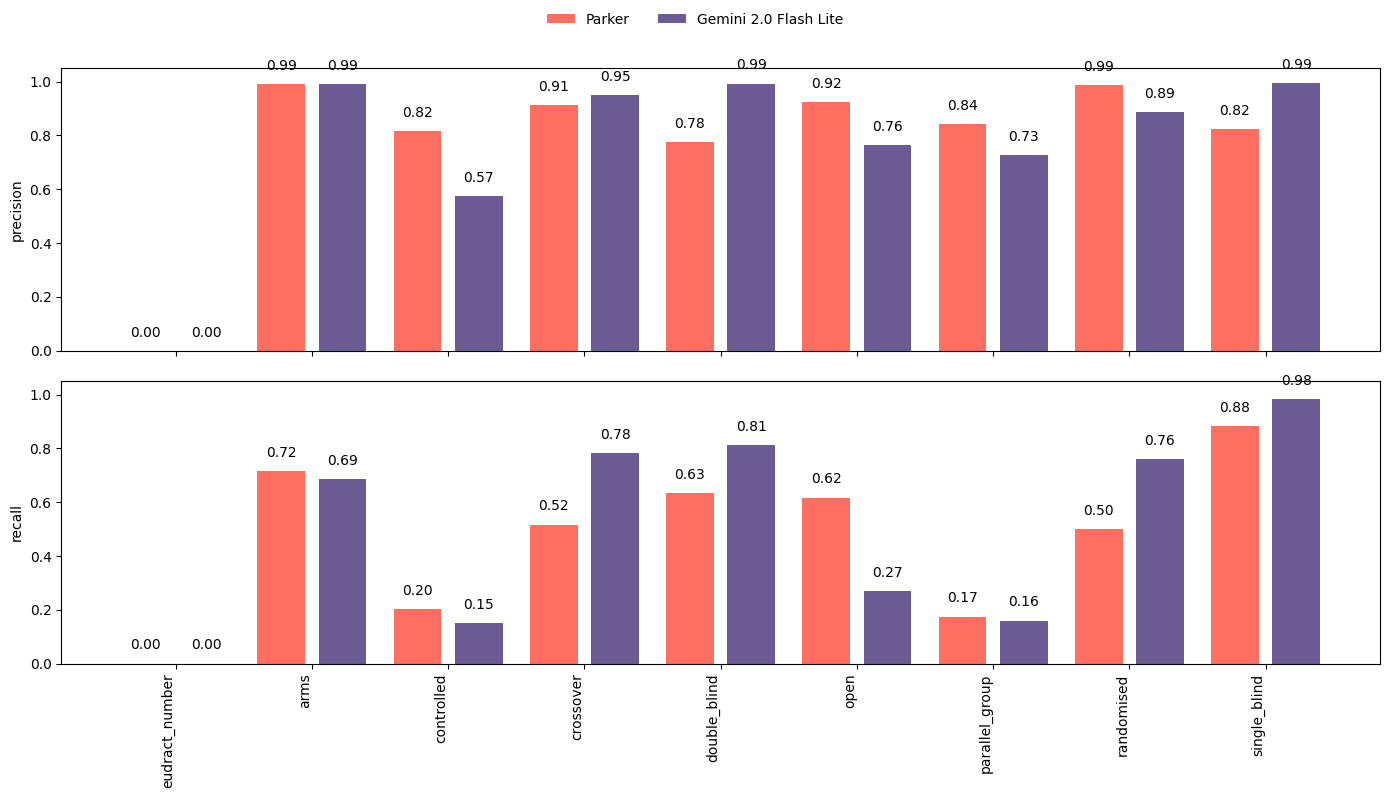

In [ ]:
# --- Macro Analysis ---
model_data = {}
for model, file_name in macro_files.items():
    with open(os.path.join(base_path, file_name), 'r') as f:
        model_data[model] = json.load(f)
metrics = ["accuracy", "f1_score", "precision", "recall", "false_positive_rate", "false_negative_rate"]
column_names = list(model_data.values())[0]["column_names"]
models = list(model_data.keys())
values_per_col = {}
for m in models:
    values_per_col[m] = {col["column_name"]: col for col in model_data[m]["stats"]}
fig, axes = plt.subplots(nrows=2, figsize=(14, 8), sharex=True)
metrics_to_plot = ['precision', 'recall']
x = np.arange(len(column_names))
width = 0.8 / len(models)
for ax, metric in zip(axes, metrics_to_plot):
    bar_values = []
    for col in column_names:
        bar_values.append([values_per_col[m][col][metric] for m in models])
    bar_values = np.array(bar_values)
    for i, (model, color) in enumerate(zip(models, colors)):
        bar_shift = 0.05
        bar_pos = x + (i - (len(models) - 1) / 2) * width + (i - 0.5) * bar_shift
        rects = ax.bar(bar_pos, bar_values[:, i],
                   width - bar_shift, label=model, color=color)
        for rect in rects:
            height = rect.get_height()
            ax.annotate(
                f"{height:.2f}",
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                va="bottom",
            )
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1.05)
axes[-1].set_xticks(x)
axes[-1].set_xticklabels(column_names, rotation=90, ha='right')
fig.legend(models, loc='upper center', ncol=len(models), frameon=False)
plt.tight_layout(rect=(0, 0, 1, 0.95), pad=2.0)